# Análisis exploratorio de datos + regresión logitica y predicción

## EDA

1. Limpieza de datos
2. Feature

In [2]:
# Librerías
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df1 = pd.read_parquet(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\2-Supervisado\1-Clasificacion\train.parquet')
df1.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,Windows 10,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,Windows 10,2.45kg,699.0
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,Windows 10,2.6kg,2419.0


Limpieza y división de columnas
Puedo:
- Clasificar por compañías (company)
- Clasificar por producto (product) ¿?
- Agrupar por tipos (TypeName)!!
- Agrupar por inches ¿?
- Agrupar por cpu
- Agrupar por ram 
- Agrupar por memoria
- Gpu
- Agrupar por sistema operativo (opsys)!!
- Rangos de peso y precio

LAS COLUMNAS IMPORTANTES PARA LA PREDICCIÓN HAY QUE PASARLAS A NUMÉRICAS

### Primera observación

In [57]:
df1.shape

(912, 13)

In [58]:
df1.columns

Index(['laptop_ID', 'Company', 'Product', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price_euros'],
      dtype='object')

In [4]:
df1.tail()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
907,837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.35kg,355.00
908,626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,4GB,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,1.25kg,379.00
909,225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 520,Linux,2.2kg,677.35
910,17,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,256GB SSD,AMD Radeon R5 M430,Windows 10,2.2kg,745.00
911,87,Dell,Inspiron 7577,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.65kg,1349.00


In [5]:
df1.describe()

,laptop_ID,Price_euros
count,912.000000,912.000000
mean,663.118421,1111.262533
std,380.713558,682.109694
min,1.000000,174.000000
25%,339.750000,598.742500
50%,666.500000,977.000000
75%,985.250000,1472.650000
max,1320.000000,5499.000000


## Agrupar por columnas

In [ ]:
#ScreenResolution
#Agrupar las medidas en una nueva columna
df1['Resolución'] = df1['ScreenResolution'].apply(
    lambda x: re.search(r'(\d{3,4}x\d{3,4})', x).group(0) if re.search(r'(\d{3,4}x\d{3,4})', x) else None)
#Crear otra variable para características de la pantalla

In [6]:
# Extraer y crear nuevas columnas
df1['tipo_pantalla'] = df1['ScreenResolution'].str.extract(r'^(\w+)')

In [7]:
df1['tipo_pantalla'] = df1['tipo_pantalla'].replace({
    '1366x768': 'HD',
    '1600x900':'HD+',
    '1920x1080':'Full HD',
    '1440x900':'WXGA+',
    '2560x1440':'Quad-HD'
    })

In [9]:
df1['memoria'] = df1['Memory'].str.extract(r'^(\w+)')
df1['tipo_memoria'] = df1['Memory'].str.extract(r"([A-Za-z]+)$")
df1['tipo_memoria'].value_counts()

tipo_memoria
SSD        435
HDD        413
Storage     54
Hybrid      10
Name: count, dtype: int64

In [11]:
df1['tipo_cpu'] = df1['Cpu'].str.extract(r'^(.*)\s')
df1['tipo_cpu'].value_counts()

tipo_cpu
Intel Core i5 7200U              139
Intel Core i7 7700HQ             113
Intel Core i7 7500U               89
Intel Core i3 6006U               56
Intel Core i5 6200U               53
                                ... 
AMD E-Series 6110                  1
AMD E-Series 9000                  1
Intel Core M m3-7Y30               1
Intel Pentium Dual Core 4405Y      1
Intel Atom X5-Z8350                1
Name: count, Length: 87, dtype: int64

In [12]:
df1[['Marca_cpu', 'Serie_cpu', 'Modelo_cpu']] = df1['tipo_cpu'].str.extract(
    r'^(Intel|AMD)\s+([\w\-]+(?:\s[\w\-]+)?)\s+(.*)$')

In [13]:
# Comprobar si todo esta GB
cantidad_con_ghz = df1['Cpu'].str.contains('GHz', case=False).sum()
print(f"Valores con 'GHz': {cantidad_con_ghz} de {len(df1)}")
#Sacar la velocidad de cpu
df1['velocidad_cpu_ghz'] = df1['Cpu'].str.extract(r'(\d+(?:\.\d+)?)GHz')

Valores con 'GHz': 912 de 912


In [14]:
#Gpu
df1[['marca_gpu', 'modelo_gpu']] = df1['Gpu'].str.extract(r'(\w+) (.*)')
df1['modelo_gpu'].value_counts()

modelo_gpu
HD Graphics 620      198
HD Graphics 520      130
GeForce GTX 1050      50
UHD Graphics 620      42
GeForce GTX 1060      34
                    ... 
FirePro W4190M         1
Iris Graphics 540      1
Radeon 540             1
GeForce GTX 970M       1
GeForce 920            1
Name: count, Length: 94, dtype: int64

In [15]:
#OpSys
df1['OpSys_general']= df1['OpSys'].replace({
    'Windows 10':'Windows',
    'Windows 7':'Windows',
    'Windows 10 S':'Windows',
    'Linux':'Linux',
    'MacOS':'MacOS',
    'Mac OS X':'MacOS',
    'Android':'Android',
    'Chrome OS':'Chrome OS',
    'No OS':'Sin OS'
    })

In [16]:
df1.head()

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,memoria,tipo_memoria,tipo_cpu,Marca_cpu,Serie_cpu,Modelo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,...,128GB,SSD,Intel Core M 7Y30,Intel,Core M,7Y30,1.0,Intel,HD Graphics 615,Windows
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,...,1TB,HDD,AMD FX 9830P,AMD,FX,9830P,3,AMD,Radeon RX 560,Windows
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD,Nvidia Quadro M2200,...,256GB,SSD,Intel Core i7 7700HQ,Intel,Core i7,7700HQ,2.8,Nvidia,Quadro M2200,Windows
3,729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,...,256GB,SSD,Intel Core i5 7200U,Intel,Core i5,7200U,2.5,Intel,HD Graphics 620,Windows
4,957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8GB,256GB SSD,Intel HD Graphics 520,...,256GB,SSD,Intel Core i5 6200U,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Windows


#### Agrupar por Ram

In [17]:
df1.groupby('Ram').size()

Ram
12GB     18
16GB    138
24GB      1
2GB      14
32GB     12
4GB     262
64GB      1
6GB      30
8GB     436
dtype: int64

In [18]:
ram= {
    '12GB':0,
    '16GB':1,
    '24GB':2,
    '2GB':3,
    '32GB':4,
    '4GB':5,
    '64GB':6,
    '6GB':7,
    '8GB':8
}
df1.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,memoria,tipo_memoria,tipo_cpu,Marca_cpu,Serie_cpu,Modelo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,4GB,128GB SSD,Intel HD Graphics 615,...,128GB,SSD,Intel Core M 7Y30,Intel,Core M,7Y30,1.0,Intel,HD Graphics 615,Windows
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8GB,1TB HDD,AMD Radeon RX 560,...,1TB,HDD,AMD FX 9830P,AMD,FX,9830P,3,AMD,Radeon RX 560,Windows


In [19]:
df1['Ram'].value_counts(normalize=True)

Ram
8GB     0.478070
4GB     0.287281
16GB    0.151316
6GB     0.032895
12GB    0.019737
2GB     0.015351
32GB    0.013158
24GB    0.001096
64GB    0.001096
Name: proportion, dtype: float64

In [20]:
df1['Ram'] = df1['Ram'].replace(ram)
df1['Ram'] = df1['Ram'].astype(int)
df1.head(3)


C:\Users\nuria\AppData\Local\Temp\ipykernel_7840\3404167785.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['Ram'] = df1['Ram'].replace(ram)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,...,memoria,tipo_memoria,tipo_cpu,Marca_cpu,Serie_cpu,Modelo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,...,128GB,SSD,Intel Core M 7Y30,Intel,Core M,7Y30,1.0,Intel,HD Graphics 615,Windows
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,...,1TB,HDD,AMD FX 9830P,AMD,FX,9830P,3,AMD,Radeon RX 560,Windows
2,744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,1,256GB SSD,Nvidia Quadro M2200,...,256GB,SSD,Intel Core i7 7700HQ,Intel,Core i7,7700HQ,2.8,Nvidia,Quadro M2200,Windows


Agrupación por sistemas operativos

In [66]:
#df1.groupby('OpSys').size()

OpSys
Android           1
Chrome OS        20
Linux            43
Mac OS X          7
No OS            39
Windows 10      760
Windows 10 S      5
Windows 7        31
macOS             6
dtype: int64

In [67]:
#sistema_operativo = {
#    'Android': 0,           
 #   'Chrome OS': 1,        
  #  'Linux': 2,            
   # 'Mac OS X' or 'macOS': 3,          
   # 'No OS': 4,            
   # 'Windows 10' or'Windows 10 S' or 'Windows': 5    
#}

In [68]:
#df1['OpSys'] = df1['OpSys'].replace(sistema_operativo)
#df1.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,5,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,5,2.45kg,699.0


In [69]:
df1.groupby('TypeName').size()

TypeName
2 in 1 Convertible     87
Gaming                149
Netbook                22
Notebook              498
Ultrabook             132
Workstation            24
dtype: int64

In [70]:
nombres= {
    '2 in 1 Convertible': 0,
    'Gaming': 1,
    'Netbook': 2,                 
    'Notebook': 3,             
    'Ultrabooks': 4 ,             
    'Workstation': 5  
}

In [71]:
df1['TypeName'] = df1['TypeName'].replace(nombres)
df1.head(2)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,0,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,5,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,1,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,5,2.45kg,699.0


In [21]:
df1.groupby('Inches').size()

Inches
10.1      3
11.3      1
11.6     25
12.0      5
12.3      5
12.5     28
13.0      2
13.3    117
13.5      3
13.9      5
14.0    131
14.1      1
15.0      4
15.4      1
15.6    461
17.0      1
17.3    118
18.4      1
dtype: int64

In [22]:
df1.set_index('laptop_ID')

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,...,memoria,tipo_memoria,tipo_cpu,Marca_cpu,Serie_cpu,Modelo_cpu,velocidad_cpu_ghz,marca_gpu,modelo_gpu,OpSys_general
laptop_ID,,,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,2 in 1 Convertible,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,Windows 10,...,128GB,SSD,Intel Core M 7Y30,Intel,Core M,7Y30,1.0,Intel,HD Graphics 615,Windows
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,Windows 10,...,1TB,HDD,AMD FX 9830P,AMD,FX,9830P,3,AMD,Radeon RX 560,Windows
744,HP,ZBook 15,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,1,256GB SSD,Nvidia Quadro M2200,Windows 10,...,256GB,SSD,Intel Core i7 7700HQ,Intel,Core i7,7700HQ,2.8,Nvidia,Quadro M2200,Windows
729,HP,Pavilion X360,2 in 1 Convertible,13.3,IPS Panel Touchscreen 1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,...,256GB,SSD,Intel Core i5 7200U,Intel,Core i5,7200U,2.5,Intel,HD Graphics 620,Windows
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,...,256GB,SSD,Intel Core i5 6200U,Intel,Core i5,6200U,2.3,Intel,HD Graphics 520,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,Acer,Chromebook 11,Netbook,11.6,IPS Panel 1366x768,Intel Celeron Dual Core N3060 1.6GHz,5,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,...,32GB,Storage,Intel Celeron Dual Core N3060,Intel,Celeron Dual,Core N3060,1.6,Intel,HD Graphics 400,Chrome OS
626,Acer,CB5-132T-C9KK (N3160/4GB/32GB/Chrome,2 in 1 Convertible,11.6,IPS Panel Touchscreen 1366x768,Intel Celeron Quad Core N3160 1.6GHz,5,32GB Flash Storage,Intel HD Graphics 400,Chrome OS,...,32GB,Storage,Intel Celeron Quad Core N3160,Intel,Celeron Quad,Core N3160,1.6,Intel,HD Graphics 400,Chrome OS
225,Dell,Inspiron 3576,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,AMD Radeon 520,Linux,...,256GB,SSD,Intel Core i5 8250U,Intel,Core i5,8250U,1.6,AMD,Radeon 520,Linux


### GUARDAR DATAFRAME

In [23]:
# Guardar el DataFrame en un nuevo archivo CSV
df1.to_csv(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\2-Supervisado\1-Clasificacion\train_modificado.csv', index=False)


### Ampliación de columnas¿?

In [90]:
# Los tipos únicos de 'TypeName'
tipos = ['2 in 1 Convertible', 'Gaming', 'Netbook', 'Notebook', 'Ultrabook', 'Workstation']

# Columnas binarias para cada tipo
for tipo in tipos:
    df1[tipo] = df1['TypeName'].apply(lambda x: 1 if x == tipo else 0)

# Eliminar la columna original si ya no la necesitas
# df = df.drop(columns=['TypeName'])

df1.head(2)


,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros,2 in 1 Convertible,Gaming,Netbook,Notebook,Ultrabook,Workstation
0,599,Dell,Inspiron 3179,0,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,5,1.39kg,603.0,0,0,0,0,0,0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,1,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,5,2.45kg,699.0,0,0,0,0,0,0


In [86]:
df = pd.read_csv(r'C:\Users\nuria\OneDrive\Escritorio\Data Science\DS102024\3-MachineLearning\2-Supervisado\1-Clasificacion\train_modificado.csv')
df.head(3)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,0,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,5,1.39kg,603.0
1,92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,1,15.6,Full HD 1920x1080,AMD FX 9830P 3GHz,8,1TB HDD,AMD Radeon RX 560,5,2.45kg,699.0
2,744,HP,ZBook 15,5,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,1,256GB SSD,Nvidia Quadro M2200,5,2.6kg,2419.0


In [75]:
df.describe()

,laptop_ID,Inches,Ram,Price_euros
count,912.000000,912.000000,912.000000,912.000000
mean,663.118421,15.007785,5.750000,1111.262533
std,380.713558,1.454677,2.622833,682.109694
min,1.000000,10.100000,0.000000,174.000000
25%,339.750000,14.000000,5.000000,598.742500
50%,666.500000,15.600000,7.000000,977.000000
75%,985.250000,15.600000,8.000000,1472.650000
max,1320.000000,18.400000,8.000000,5499.000000


In [78]:
print(df.groupby('Ram').size())
print(df.groupby('TypeName').size())
print(df.groupby('OpSys').size())

Ram
0     18
1    138
2      1
3     14
4     12
5    262
6      1
7     30
8    436
dtype: int64
TypeName
0             87
1            149
2             22
3            498
5             24
Ultrabook    132
dtype: int64
OpSys
0                 1
1                20
2                43
3                 7
4                39
5               760
Windows 10 S      5
Windows 7        31
macOS             6
dtype: int64


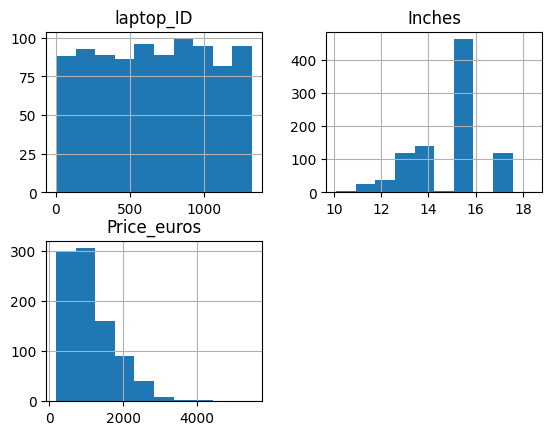

In [87]:
df.drop(columns=['Ram']).hist()
plt.show()

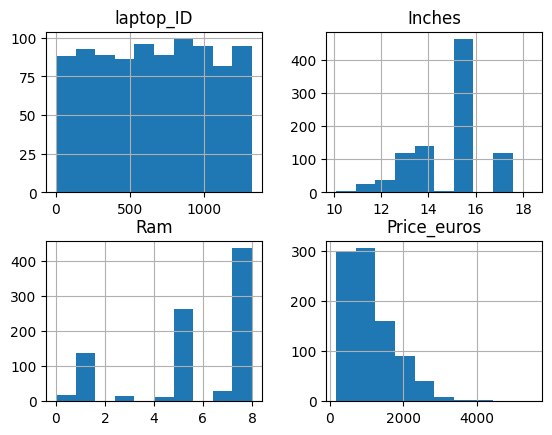

In [88]:
df.drop(columns=['TypeName']).hist()
plt.show()

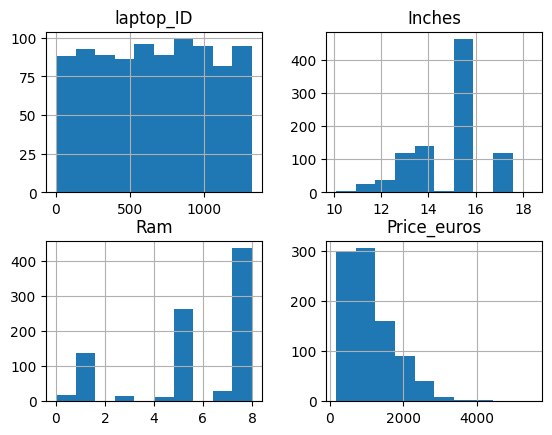

In [89]:
df.drop(columns=['OpSys']).hist()
plt.show()

- Los datos no tienen una distribución normal

In [91]:
df.head(1)

,laptop_ID,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,599,Dell,Inspiron 3179,0,11.6,Touchscreen 1366x768,Intel Core M 7Y30 1.0GHz,5,128GB SSD,Intel HD Graphics 615,5,1.39kg,603.0


In [95]:
# Convertir 'OpSys' a numérico usando el método de codificación
df['OpSys'] = df['OpSys'].astype('category').cat.codes

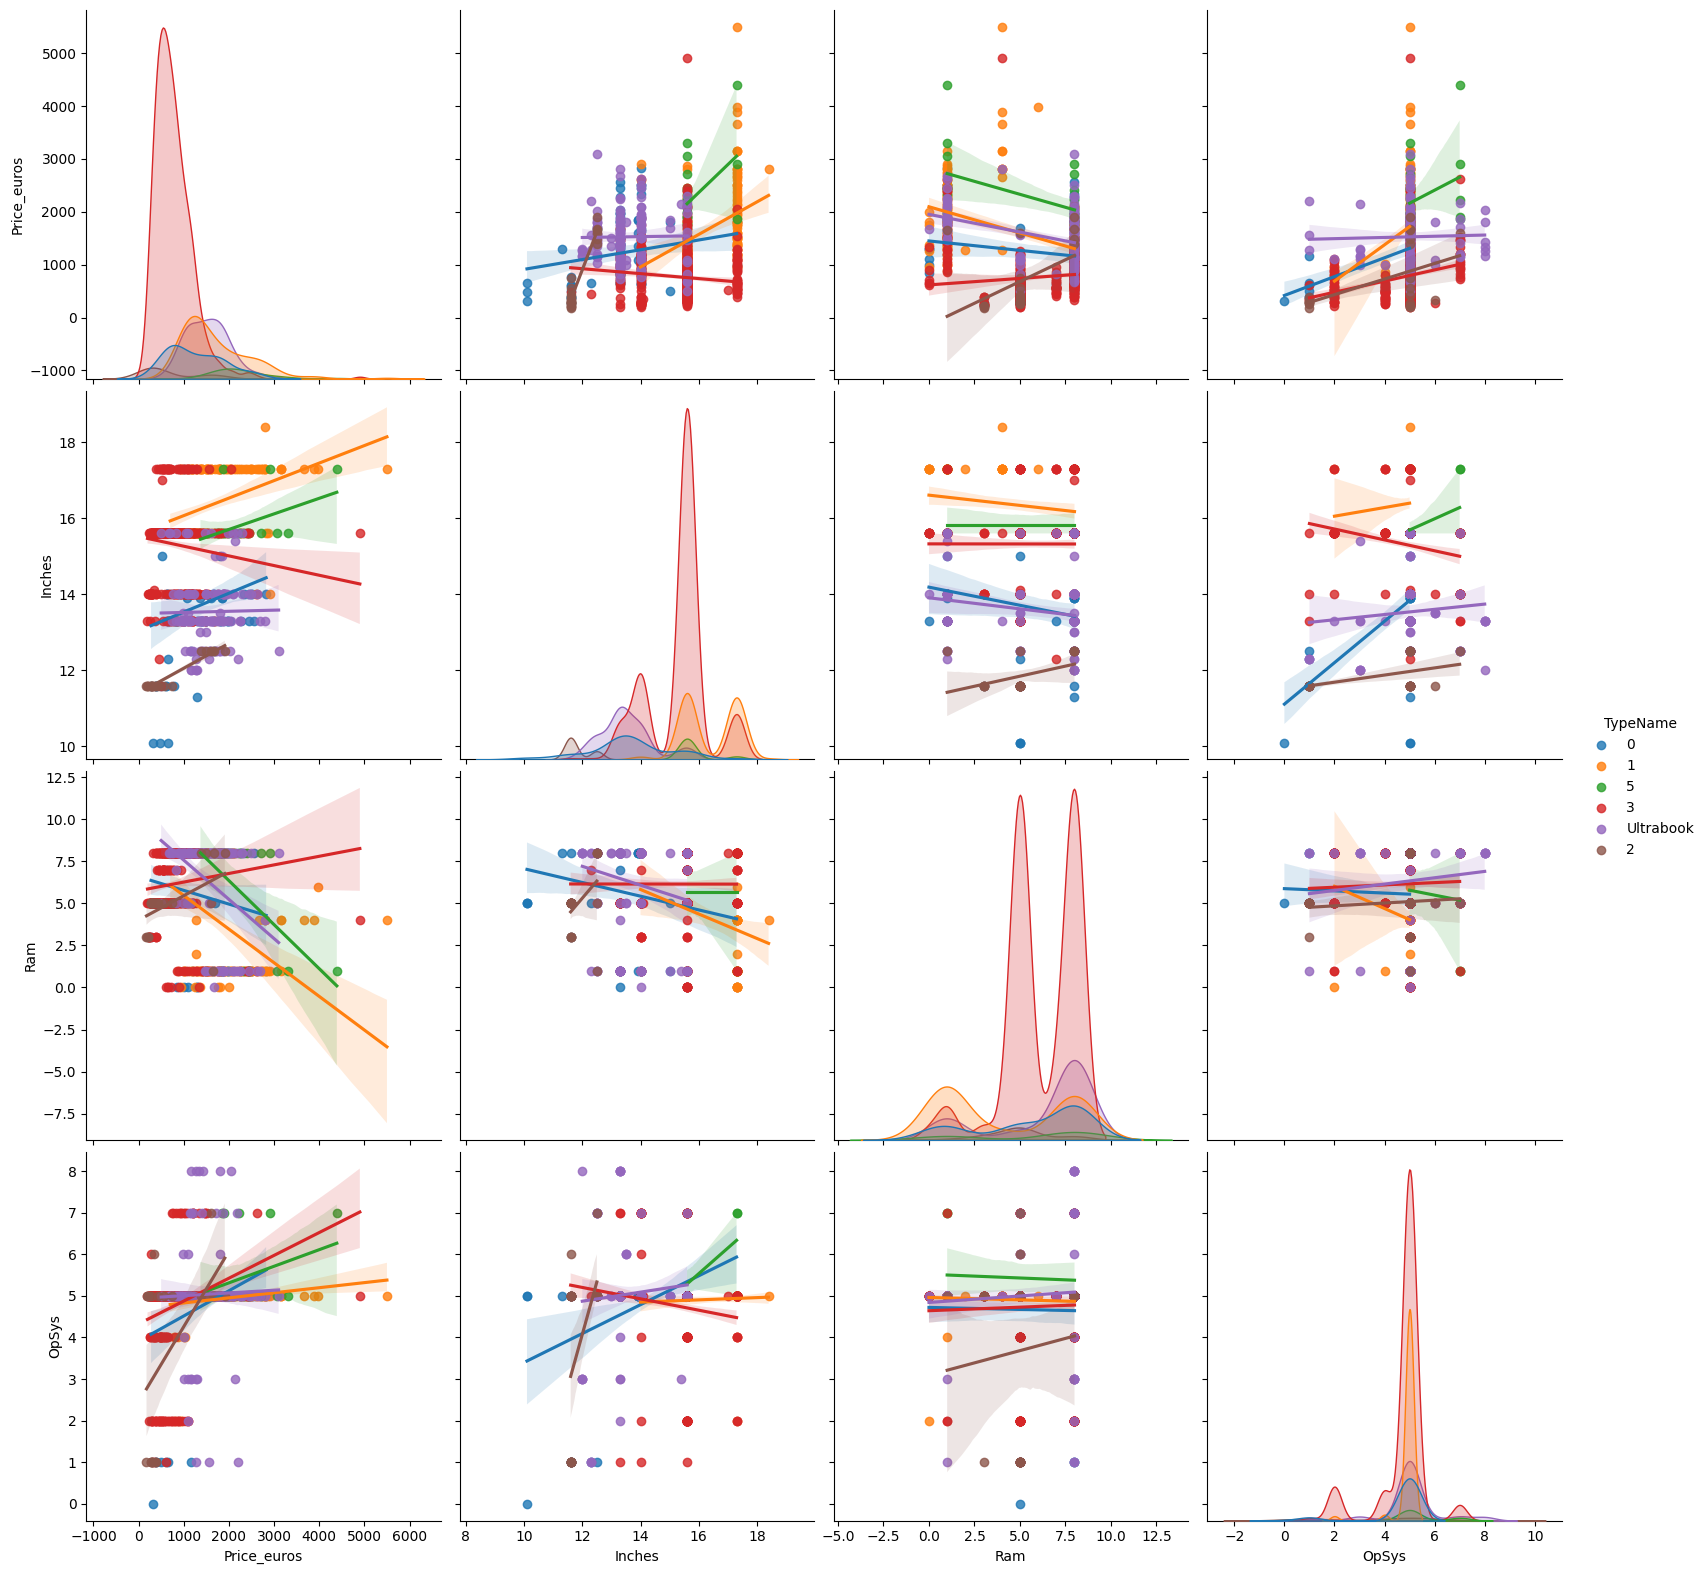

In [96]:
sns.pairplot(df.dropna(),
            hue='TypeName', # Para que lo separe por clase
            height=4,
            vars=["Price_euros","Inches","Ram", "OpSys"],
            kind='reg');

In [102]:
print(df.dtypes)

laptop_ID             int64
Company              object
Product              object
TypeName             object
Inches              float64
ScreenResolution     object
Cpu                  object
Ram                   int64
Memory               object
Gpu                  object
OpSys                  int8
Weight               object
Price_euros         float64
dtype: object


In [105]:
# Convertir todas las columnas a numéricas, forzando a NaN donde no se pueda
df_numeric = df.apply(pd.to_numeric, errors='coerce')


## Creación del modelo ML

In [106]:
from sklearn.linear_model import LogisticRegression

In [107]:
X = np.array(df.drop(columns=['TypeName'])) # La x es todo menos el nombre
y = np.array(df['TypeName']) # La y es el nombre

In [109]:
# Modelo instanciado
model = LogisticRegression(max_iter=2000) # El max_iter te hace las interacciones que quieras y QUITA EL WARNING DE PREDICCIÓN MENOS PRECISA

# Modelo entrenado
model.fit(X, y) #Cuanto mayor sea el iter mas prediccion tendra pero hay que tener cuidado con el over trained

ValueError: could not convert string to float: 'Dell'